In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
rdata = pd.read_csv('raw_eng.csv')
rdata.head()

,vin_nbr,element_cd,min,max
0,1G1FB6S0XN40005EX,LIFETIME_ENERGY_USED,5436.5,5436.5
1,1G1FW6S00H4124761,LIFETIME_ENERGY_USED,27445.1,27474.1
2,1G1FW6S00H4128101,LIFETIME_ENERGY_USED,7380.2,7380.2
3,1G1FW6S00H4128776,LIFETIME_ENERGY_USED,13006.6,13020.5
4,1G1FW6S00H4133279,LIFETIME_ENERGY_USED,19167.9,19167.9


In [5]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37314 entries, 0 to 37313
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vin_nbr     37314 non-null  object 
 1   element_cd  37314 non-null  object 
 2   min         37314 non-null  float64
 3   max         37314 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


In [6]:
ddata = pd.read_csv('derived_eng.csv')
ddata.drop_duplicates()
ddata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty
0,1G1RA6E41FU100024,2020-06-18 18:12:50,2020-06-18 21:59:27,12.3
1,1G1RB6E43FU100006,2020-06-17 11:50:34,2020-06-17 13:02:27,4.0
2,1G1RB6E43FU100006,2020-06-17 11:50:34,2020-06-17 13:02:27,4.0
3,1G1RB6E48FU106609,2020-06-18 16:14:00,2020-06-19 01:56:24,8.3
4,1G1RB6E4XFU110984,2020-06-18 15:03:57,2020-06-18 17:06:59,6.4


In [7]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56084 entries, 0 to 56083
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              56084 non-null  object 
 1   charge_start_timstm  56084 non-null  object 
 2   charge_end_timstm    56084 non-null  object 
 3   charge_kwh_qty       56084 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [8]:
aggregate_functions = {'charge_start_timstm' : 'first','charge_end_timstm' : 'last','charge_kwh_qty' : 'sum'}
ddata = ddata.groupby(ddata['vin_nbr']).aggregate(aggregate_functions)
ddata.head()

,charge_start_timstm,charge_end_timstm,charge_kwh_qty
vin_nbr,,,
1G1FB6S0XN40005EX,2020-06-18 11:50:34,2020-06-19 03:54:19,0.0
1G1FW6S00H4124761,2020-06-19 07:53:34,2020-06-19 12:02:46,29.0
1G1FW6S00H4128101,2020-06-18 12:36:12,2020-06-19 00:45:20,46.1
1G1FW6S00H4128311,2020-06-18 20:00:16,2020-06-19 08:10:08,13.1
1G1FW6S00H4128776,2020-06-18 19:01:26,2020-06-18 20:59:21,13.9


In [9]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37418 entries, 1G1FB6S0XN40005EX to LREKK5RXXJA013142
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   charge_start_timstm  37418 non-null  object 
 1   charge_end_timstm    37418 non-null  object 
 2   charge_kwh_qty       37418 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [10]:
mdata = ddata.merge(rdata,'outer',on = 'vin_nbr')
mdata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max
0,1G1FB6S0XN40005EX,2020-06-18 11:50:34,2020-06-19 03:54:19,0.0,LIFETIME_ENERGY_USED,5436.5,5436.5
1,1G1FW6S00H4124761,2020-06-19 07:53:34,2020-06-19 12:02:46,29.0,LIFETIME_ENERGY_USED,27445.1,27474.1
2,1G1FW6S00H4128101,2020-06-18 12:36:12,2020-06-19 00:45:20,46.1,LIFETIME_ENERGY_USED,7380.2,7380.2
3,1G1FW6S00H4128311,2020-06-18 20:00:16,2020-06-19 08:10:08,13.1,LIFETIME_ENERGY_USED,17447.2,17460.3
4,1G1FW6S00H4128776,2020-06-18 19:01:26,2020-06-18 20:59:21,13.9,LIFETIME_ENERGY_USED,13006.6,13020.5


In [11]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37463 entries, 0 to 37462
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              37463 non-null  object 
 1   charge_start_timstm  37418 non-null  object 
 2   charge_end_timstm    37418 non-null  object 
 3   charge_kwh_qty       37418 non-null  float64
 4   element_cd           37314 non-null  object 
 5   min                  37314 non-null  float64
 6   max                  37314 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.3+ MB


In [12]:
mdata = mdata.dropna(how = 'any', axis=0)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37269 entries, 0 to 37417
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              37269 non-null  object 
 1   charge_start_timstm  37269 non-null  object 
 2   charge_end_timstm    37269 non-null  object 
 3   charge_kwh_qty       37269 non-null  float64
 4   element_cd           37269 non-null  object 
 5   min                  37269 non-null  float64
 6   max                  37269 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.3+ MB


In [13]:
mdata['diff'] = mdata['max']-mdata['min']
mdata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max,diff
0,1G1FB6S0XN40005EX,2020-06-18 11:50:34,2020-06-19 03:54:19,0.0,LIFETIME_ENERGY_USED,5436.5,5436.5,0.0
1,1G1FW6S00H4124761,2020-06-19 07:53:34,2020-06-19 12:02:46,29.0,LIFETIME_ENERGY_USED,27445.1,27474.1,29.0
2,1G1FW6S00H4128101,2020-06-18 12:36:12,2020-06-19 00:45:20,46.1,LIFETIME_ENERGY_USED,7380.2,7380.2,0.0
3,1G1FW6S00H4128311,2020-06-18 20:00:16,2020-06-19 08:10:08,13.1,LIFETIME_ENERGY_USED,17447.2,17460.3,13.1
4,1G1FW6S00H4128776,2020-06-18 19:01:26,2020-06-18 20:59:21,13.9,LIFETIME_ENERGY_USED,13006.6,13020.5,13.9


In [15]:
mdata['diff'].idxmax()

8382

In [18]:
mdata.iloc[8382] 

vin_nbr                   1G1FX6S0XH4189131
charge_start_timstm     2020-06-18 12:09:58
charge_end_timstm       2020-06-18 13:46:58
charge_kwh_qty                         12.4
element_cd             LIFETIME_ENERGY_USED
min                                 17870.7
max                                 17870.7
diff                                      0
Name: 8406, dtype: object

In [13]:
sum(n == 0 for n in mdata['diff'])

15844

In [14]:
good = mdata[mdata['diff'] != 0].index
baddata = mdata.drop(good,axis = 0)
baddata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max,diff
0,1G1FB6S0XN40005EX,2020-06-18 11:50:34,2020-06-19 03:54:19,0.0,LIFETIME_ENERGY_USED,5436.5,5436.5,0.0
2,1G1FW6S00H4128101,2020-06-18 12:36:12,2020-06-19 00:45:20,46.1,LIFETIME_ENERGY_USED,7380.2,7380.2,0.0
8,1G1FW6S00H4131659,2020-06-17 21:08:00,2020-06-17 23:58:24,39.0,LIFETIME_ENERGY_USED,12624.8,12624.8,0.0
9,1G1FW6S00H4133279,2020-06-16 20:01:50,2020-06-16 20:48:04,4.8,LIFETIME_ENERGY_USED,19167.9,19167.9,0.0
11,1G1FW6S00H4134268,2020-06-18 06:06:44,2020-06-19 00:18:18,11.3,LIFETIME_ENERGY_USED,9587.1,9587.1,0.0


In [15]:
baddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15844 entries, 0 to 37406
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              15844 non-null  object 
 1   charge_start_timstm  15844 non-null  object 
 2   charge_end_timstm    15844 non-null  object 
 3   charge_kwh_qty       15844 non-null  float64
 4   element_cd           15844 non-null  object 
 5   min                  15844 non-null  float64
 6   max                  15844 non-null  float64
 7   diff                 15844 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.1+ MB


In [16]:
bad = mdata[mdata['diff'] == 0].index
mdata = mdata.drop(bad,axis = 0)

In [17]:
mdata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max,diff
1,1G1FW6S00H4124761,2020-06-19 07:53:34,2020-06-19 12:02:46,29.0,LIFETIME_ENERGY_USED,27445.1,27474.1,29.0
3,1G1FW6S00H4128311,2020-06-18 20:00:16,2020-06-19 08:10:08,13.1,LIFETIME_ENERGY_USED,17447.2,17460.3,13.1
4,1G1FW6S00H4128776,2020-06-18 19:01:26,2020-06-18 20:59:21,13.9,LIFETIME_ENERGY_USED,13006.6,13020.5,13.9
5,1G1FW6S00H4129166,2020-06-18 17:24:18,2020-06-18 22:04:47,32.9,LIFETIME_ENERGY_USED,27827.1,27860.0,32.9
6,1G1FW6S00H4129636,2020-06-18 20:00:37,2020-06-18 21:01:15,7.3,LIFETIME_ENERGY_USED,16701.2,16708.5,7.3


In [18]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21425 entries, 1 to 37417
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              21425 non-null  object 
 1   charge_start_timstm  21425 non-null  object 
 2   charge_end_timstm    21425 non-null  object 
 3   charge_kwh_qty       21425 non-null  float64
 4   element_cd           21425 non-null  object 
 5   min                  21425 non-null  float64
 6   max                  21425 non-null  float64
 7   diff                 21425 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.5+ MB


In [19]:
mdata['pwr_percent'] = mdata['charge_kwh_qty']/mdata['diff']*100
mdata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max,diff,pwr_percent
1,1G1FW6S00H4124761,2020-06-19 07:53:34,2020-06-19 12:02:46,29.0,LIFETIME_ENERGY_USED,27445.1,27474.1,29.0,100.0
3,1G1FW6S00H4128311,2020-06-18 20:00:16,2020-06-19 08:10:08,13.1,LIFETIME_ENERGY_USED,17447.2,17460.3,13.1,100.0
4,1G1FW6S00H4128776,2020-06-18 19:01:26,2020-06-18 20:59:21,13.9,LIFETIME_ENERGY_USED,13006.6,13020.5,13.9,100.0
5,1G1FW6S00H4129166,2020-06-18 17:24:18,2020-06-18 22:04:47,32.9,LIFETIME_ENERGY_USED,27827.1,27860.0,32.9,100.0
6,1G1FW6S00H4129636,2020-06-18 20:00:37,2020-06-18 21:01:15,7.3,LIFETIME_ENERGY_USED,16701.2,16708.5,7.3,100.0


In [20]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21425 entries, 1 to 37417
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin_nbr              21425 non-null  object 
 1   charge_start_timstm  21425 non-null  object 
 2   charge_end_timstm    21425 non-null  object 
 3   charge_kwh_qty       21425 non-null  float64
 4   element_cd           21425 non-null  object 
 5   min                  21425 non-null  float64
 6   max                  21425 non-null  float64
 7   diff                 21425 non-null  float64
 8   pwr_percent          21425 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.6+ MB


In [21]:
mdata['pwr_percent'].min()

-2087.500000001899

In [22]:
mdata['pwr_percent'].max()

308699.99999992986

In [23]:
mdata['bins'] = pd.cut(mdata['pwr_percent'],bins = [float("-inf"),90,95,99,100.0001,float("inf")], labels = ["Below 90%", "90%-95%","95%-99%","99%-100%","Over 100%"])
pie_data = mdata.groupby('bins').size()

In [24]:
pie_data

bins
Below 90%     3155
90%-95%        198
95%-99%        225
99%-100%     11218
Over 100%     6629
dtype: int64

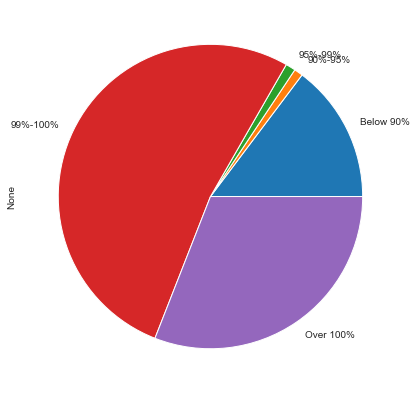

In [25]:
pie_data.plot.pie(figsize=(7,7))

In [26]:
gooddata = mdata[mdata['bins'] != "Over 100%"].index
rdata = mdata.drop(gooddata,axis = 0)
rdata.head()

,vin_nbr,charge_start_timstm,charge_end_timstm,charge_kwh_qty,element_cd,min,max,diff,pwr_percent,bins
7,1G1FW6S00H4130091,2020-06-18 17:46:14,2020-06-19 06:23:08,21.8,LIFETIME_ENERGY_USED,8610.8,8621.7,10.9,200.000000,Over 100%
18,1G1FW6S00H4137820,2020-06-18 11:21:34,2020-06-19 12:22:05,47.0,LIFETIME_ENERGY_USED,16251.2,16273.2,22.0,213.636364,Over 100%
19,1G1FW6S00H4138028,2020-06-18 14:49:07,2020-06-19 05:19:17,18.1,LIFETIME_ENERGY_USED,10830.5,10843.5,13.0,139.230769,Over 100%
21,1G1FW6S00H4138174,2020-06-18 14:16:04,2020-06-19 06:16:00,1.3,LIFETIME_ENERGY_USED,16198.4,16199.0,0.6,216.666667,Over 100%
23,1G1FW6S00H4138644,2020-06-17 18:17:49,2020-06-19 05:36:30,108.6,LIFETIME_ENERGY_USED,20568.5,20579.4,10.9,996.330275,Over 100%


In [27]:
rdata.to_csv('EnginePowerOutput.csv')